In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
a0 = 5
a1 = 0.5
b1 = 1
sigma=0.8
N = 1000

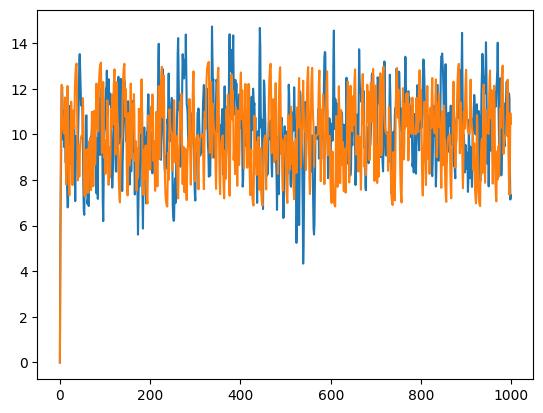

In [3]:
h_1 = [0]
h_2 = [0]
eps_1 = np.random.normal(loc=0, scale=sigma, size=N)
eps_2 = np.random.choice([-sigma, sigma], size=N)
for i in range(1, N):
    h_1.append(h_1[-1]*a1 + a0 + eps_1[i] + b1*eps_1[i - 1])
    h_2.append(h_2[-1]*a1 + a0 + eps_2[i] + b1*eps_2[i - 1])

plt.plot(h_1)
plt.plot(h_2)
plt.show()

In [4]:
l = 100
h_1_mean = 1/(N - l) * np.sum(h_1[l:])
h_2_mean = 1/(N - l) * np.sum(h_2[l:])
h_1_sigma2 = 1/(N - l - 1) * np.sum((h_1[l:] - h_1_mean)**2)
h_2_sigma2 = 1/(N - l - 1) * np.sum((h_2[l:] - h_2_mean)**2)
K1 = [1/(N - l) * np.sum((h_1[l+i:] - h_1_mean)*(h_1[l:-i] - h_1_mean)) for i in range(1, 4)]
K2 = [1/(N - l) * np.sum((h_2[l+i:] - h_2_mean)*(h_2[l:-i] - h_2_mean)) for i in range(1, 4)]

In [5]:
mu_true = a0 / (1 - a1)
var_true = sigma**2 * (1 + 2*a1*b1 + b1**2) / (1 - a1**2)
K_true = [sigma**2 * a1**(i-1) * (a1+b1) * (1 + a1*b1) / (1 - a1**2) for i in range(1, 4)]

In [6]:
from scipy.optimize import fsolve

a1_hat_1 = K1[1]/K1[0]
a0_hat_1 = h_1_mean * (1 - a1_hat_1)
def equation_for_b1(b1):
    num = (a1_hat_1 + b1) * (1 + a1_hat_1 * b1)
    den = (1 + b1**2 + 2*a1_hat_1*b1)
    return (K1[0]/h_1_sigma2) - num/den

b1_hat_1 = fsolve(equation_for_b1, x0=0.5)[0]
sigma2_hat_1 = h_1_sigma2 * (1 - a1_hat_1**2) / (1 + b1_hat_1**2 + 2*a1_hat_1*b1_hat_1)

a1_hat_2 = K2[1]/K2[0]
a0_hat_2 = h_2_mean * (1 - a1_hat_2)
def equation_for_b2(b2):
    num = (a1_hat_2 + b2) * (1 + a1_hat_2 * b2)
    den = (1 + b2**2 + 2*a1_hat_2*b2)
    return (K2[0]/h_2_sigma2) - num/den

b1_hat_2 = fsolve(equation_for_b2, x0=0.5)[0]
sigma2_hat_2 = h_2_sigma2 * (1 - a1_hat_2**2) / (1 + b1_hat_2**2 + 2*a1_hat_2*b1_hat_2)

C:\Users\Kuzne\AppData\Local\Temp\ipykernel_15380\2259661073.py:20: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  b1_hat_2 = fsolve(equation_for_b2, x0=0.5)[0]


In [7]:
print(f"a0 true: {a0},\n a1 true: {a1},\n b1 true: {b1},\n sigma^2 true: {sigma**2:.2f}.")
print(f"h1:\n a0: {a0_hat_1:.2f},\n a1: {a1_hat_1:.2f},\n b1: {b1_hat_1:.2f},\n sigma^2: {sigma2_hat_1:.2f}.")
print(f"h2:\n a0: {a0_hat_2:.2f},\n a1: {a1_hat_2:.2f},\n b1: {b1_hat_2:.2f},\n sigma^2: {sigma2_hat_2:.2f}.")

a0 true: 5,
 a1 true: 0.5,
 b1 true: 1,
 sigma^2 true: 0.64.
h1:
 a0: 4.71,
 a1: 0.54,
 b1: 0.70,
 sigma^2: 0.80.
h2:
 a0: 5.53,
 a1: 0.44,
 b1: 1.00,
 sigma^2: 0.65.


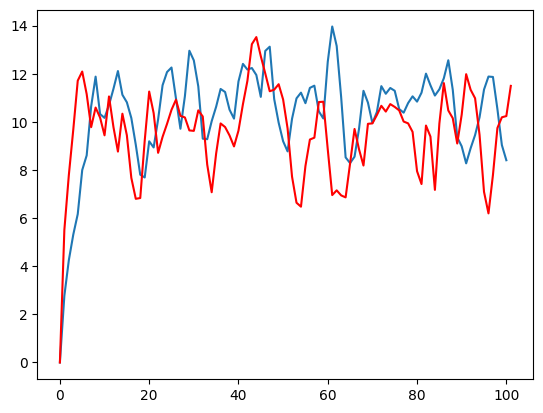

In [8]:
def predict(timesteps, a0, a1, b1, h1):
    h_n = [h1]
    eps = np.random.normal(loc=0, scale=sigma, size=timesteps + 1)
    for i in range(timesteps):
        h_n.append(a1*h_n[-1] + a0 + eps[i + 1] + b1*eps[i])
    return h_n

h_11_pred = predict(100, a0_hat_1, a1_hat_1, b1_hat_1, h_1[0])
h_11_true = h_1[0:102]
plt.plot(h_11_pred)
plt.plot(h_11_true, color="red")
plt.show()